In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import utils

# Sequential Model

In [2]:
def create_model():
    model = models.Sequential()

    model._name = 'Sequential Model'
    
    model.add(layers.Input(shape = (28, 28, 1)))
    model.add(layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'valid'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'valid'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size = 2, strides = 1))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation = 'softmax'))

    return model

In [3]:
seq_model = create_model()

In [4]:
seq_model.summary()

Model: "Sequential Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                  

## Model Visualization

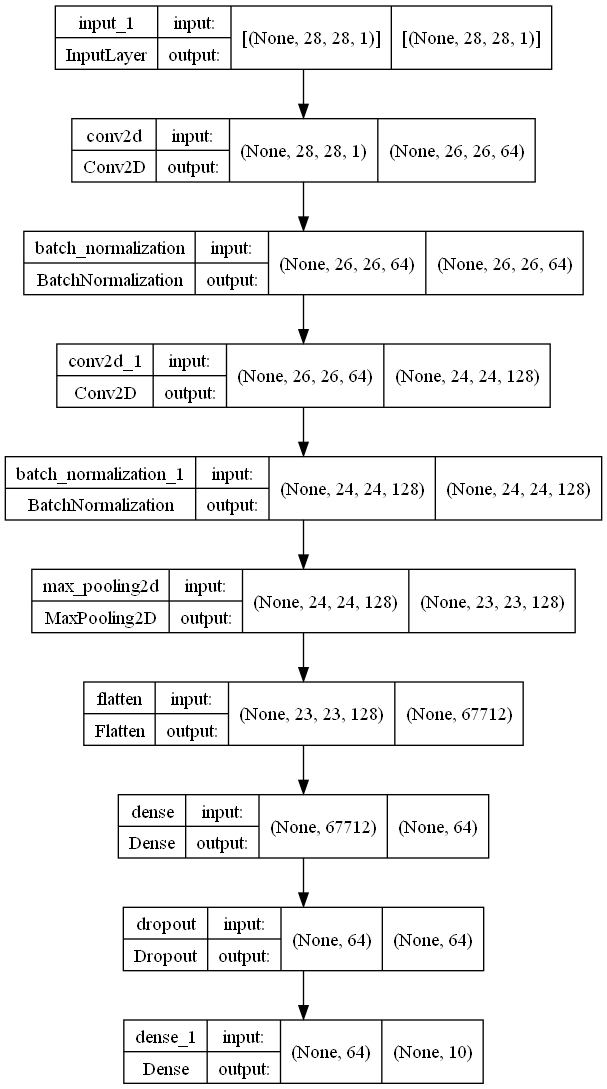

In [5]:
utils.plot_model(seq_model, show_layer_names = 'True', show_shapes = 'True')

# Functional Model

In [6]:
def create_model():
    inp = layers.Input(shape = (28, 28, 1))
    
    conv = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'valid')(inp)
    bn = layers.BatchNormalization()(conv)
    conv = layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'valid')(bn)
    bn = layers.BatchNormalization()(conv)
    pool = layers.MaxPool2D(pool_size = 2, strides = 1)(bn)

    flat = layers.Flatten()(pool)
    dense = layers.Dense(64, activation = 'relu')(flat)
    drop = layers.Dropout(0.5)(dense)
    
    op = layers.Dense(10, activation = 'softmax')(drop)

    model = models.Model(inputs = inp, outputs = op)
    model._name = 'Functional Model'
    
    return model

In [7]:
func_model = create_model()

In [8]:
func_model.summary()

Model: "Functional Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_3 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128) 

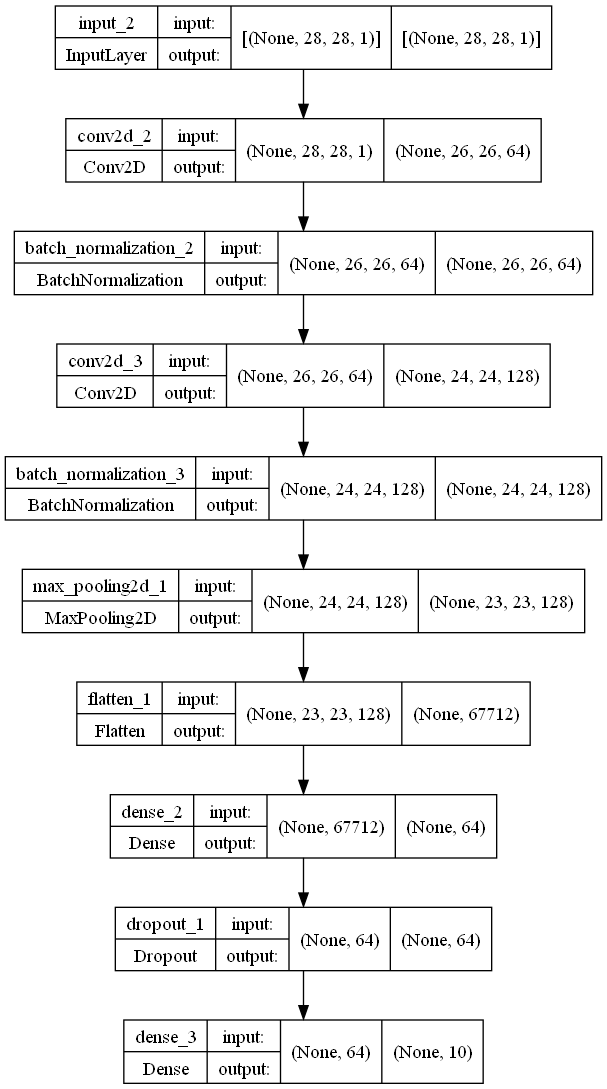

In [9]:
utils.plot_model(func_model, show_layer_names = 'True', show_shapes = 'True')